In [ ]:
!pip install dowhy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 15.4 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
! sudo apt install graphviz libgraphviz-dev graphviz-dev pkg-config

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.2

In [ ]:
! pip install pygraphviz --install-option="--include-path=/usr/include/graphviz" \
--install-option="--library-path=/usr/lib/graphviz/"

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 118 kB 14.3 MB/s 
Skipping wheel build for pygraphviz, due to binaries being disabled for it.
    Running setup.py install for pygraphviz ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-uswr5oj8/pygraphviz_779a6d1b9f8545338b76475ce4893b45/setup.py'"'"'; __file__='"'"'/tmp/pip-install-uswr5oj8/pygraphviz_779a6d1b9f8545338b76475ce4893b45/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.re

In [ ]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

## DO WHY
Modeling causal assumptions and validating them from real data

getting the extent of influence
### Possible usecases:

- Will it work?
    - Does a applied promotion lead to increased conversion?
    - Does an ad lead to more traffic?

- Why did it work?
    - Was it rep_oos that led to a change in sales?

- What should we do?
    - What changes to a system are likely to improve sales?

- What are the overall effects?
    - What's the impact of stockout on the sales?

Answering these questions requires causal reasoning. While many methods exist for causal inference, it is hard to compare their assumptions and robustness of results. DoWhy makes three contributions,

1. Provides a principled way of modeling a given problem as a **causal graph** so that all assumptions are explicit.
2. Provides a unified interface for many popular causal inference methods, combining the two major frameworks of **graphical models and potential outcomes**.
3. Automatically **tests for the validity of assumptions** if possible and assesses **the robustness** of the estimate to violations.

In [ ]:
file_path_asin_stats = "/content/SU ASIN Stats.csv"
file_path_ad_data = "/content/Ad Data - 3 clients.xlsx"

In [ ]:
cdf = pd.read_csv(file_path_asin_stats)

In [ ]:
cdf.head().T

,0,1,2,3,4
org_type,Amazon_1PP,Amazon_1PP,Amazon_1PP,Amazon_1PP,Amazon_1PP
marketplace,Amazon,Amazon,Amazon,Amazon,Amazon
region,US,US,US,US,US
period,2022-07-31,2022-07-31,2022-07-31,2022-07-31,2022-07-31
reporting_range,Weekly,Weekly,Weekly,Weekly,Weekly
product_code,B00006BMQT,B08F9ZHQTF,B089Q25DRT,B09J753M18,B07H1B3PY9
brand,Polk,Marantz,Denon,Polk,Polk
category,In Ceiling/In-Wall,AVR,AVR,Soundbars,Soundbars
short_name,RC80i,SR5015,AVRX6700H,Signa S4,SIGNA S2 SOUNDBAR SYSTEM
release_date,2005-08-01,2020-09-15,2020-06-15,2022-01-05,2018-10-01


In [ ]:
cdf.columns.to_list()

['org_type',
 'marketplace',
 'region',
 'period',
 'reporting_range',
 'product_code',
 'brand',
 'category',
 'short_name',
 'release_date',
 'catalog_price',
 'replenishment_status',
 'Sales_Week',
 'Sales_Month',
 'Sales_Quarter',
 'Sales_Year',
 'product_sales',
 'product_units_sold',
 'ordered_revenue_sales',
 'ly_ordered_revenue_sales',
 'ordered_units_sales',
 'ly_ordered_units_sales',
 'glance_views',
 '_Of_Total_GVs',
 'ly_glance_views',
 'conversion_rate',
 'ly_conversion_rate',
 'Fast_Track_Glance_View',
 'rep_oos',
 'lbb',
 'customer_returns',
 'free_replacements',
 'weeks_on_hand',
 'open_purchase_order_quantity',
 'sell_through_forecast_4_weeks',
 'promotion_type',
 'has_promotion',
 'per_unit_funding_amount',
 'Rating',
 'new_review_count',
 'count_negative_reviews',
 'percentage_1_or_2_reviews',
 'percentage_4_or_5_reviews',
 'net_ppm',
 'sell_through_rate',
 'financial_charge',
 'accepted_quantity',
 'reseller_new_count',
 'min_reseller_price',
 'max_reseller_price',


In [ ]:
cdf.shape

In [ ]:
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
catalog_price,101041.0,1086.591330,6644.980841,0.000000,199.950000,379.000000,699.000000,9.999900e+04
Sales_Week,124545.0,24.247236,13.743287,1.000000,13.000000,24.000000,35.000000,5.200000e+01
Sales_Month,124545.0,5.892786,3.191788,1.000000,3.000000,6.000000,8.000000,1.200000e+01
Sales_Quarter,124545.0,2.304276,1.041413,1.000000,1.000000,2.000000,3.000000,4.000000e+00
Sales_Year,124545.0,2020.548862,0.603436,2020.000000,2020.000000,2020.000000,2021.000000,2.022000e+03
product_sales,32488.0,4432.029375,20007.418974,0.000000,0.000000,495.250000,2904.000000,1.479283e+06
product_units_sold,32488.0,24.180374,132.066285,0.000000,0.000000,2.000000,12.000000,9.259000e+03
ordered_revenue_sales,31517.0,5809.760738,26329.072116,-242916.600000,0.000000,751.120000,4111.570000,2.758992e+06
ly_ordered_revenue_sales,12731.0,9902.405158,25771.108891,-242432.432432,1219.538930,3489.999417,9160.264015,1.155572e+06
ordered_units_sales,31517.0,25.751753,144.886760,-986.000000,0.000000,2.000000,14.000000,1.204800e+04


In [ ]:
cdf.nunique()

org_type                             1
marketplace                          1
region                               1
period                             134
reporting_range                      1
product_code                      1533
brand                                7
category                            14
short_name                        1506
release_date                       483
catalog_price                      235
replenishment_status                 8
Sales_Week                          52
Sales_Month                         12
Sales_Quarter                        4
Sales_Year                           3
product_sales                     8036
product_units_sold                 634
ordered_revenue_sales             9651
ly_ordered_revenue_sales         11585
ordered_units_sales                653
ly_ordered_units_sales            3887
glance_views                      4974
_Of_Total_GVs                     1734
ly_glance_views                   4517
conversion_rate          

In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124545 entries, 0 to 124544
Data columns (total 57 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   org_type                       124545 non-null  object 
 1   marketplace                    124545 non-null  object 
 2   region                         124545 non-null  object 
 3   period                         124545 non-null  object 
 4   reporting_range                124545 non-null  object 
 5   product_code                   124545 non-null  object 
 6   brand                          124545 non-null  object 
 7   category                       124535 non-null  object 
 8   short_name                     124545 non-null  object 
 9   release_date                   113716 non-null  object 
 10  catalog_price                  101041 non-null  float64
 11  replenishment_status           111509 non-null  object 
 12  Sales_Week                    

**Disclaimer**: This is actual business data of a leading designer and manufacturer of consumer audio product selling their devices on Amazon. We have the permission to use the data for academic assignments. To respect the privacy of the business, we have anonymized the data. 

**Details about the data**: This data contains 1,24,545 rows and 57 columns spanning across 1,533 unique products across 7 brands and 14 categories from Jan, 2020 to Jul 2022. 

In [ ]:
cdf[cdf['has_promotion']=="Yes"].sort_values(by=['ordered_revenue_sales'],ascending=False)

,org_type,marketplace,region,period,reporting_range,product_code,brand,category,short_name,release_date,...,reseller_new_count,min_reseller_price,max_reseller_price,total_reseller_count,perc_best_choice_badge,perc_best_seller,median_bsr_sub_cat,median_bsr_cat,avg_buy_box,avg_search_rank
75262,Amazon_1PP,Amazon,US,2020-10-11,Weekly,B07H1B3PY9,Polk,Soundbars,SIGNA S2 SOUNDBAR SYSTEM,2018-10-01,...,8.0,149.00,315.04,8.0,1.000000,0.142857,2.0,118.0,156.142857,18.000000
72731,Amazon_1PP,Amazon,US,2020-10-25,Weekly,B07H1B3PY9,Polk,Soundbars,SIGNA S2 SOUNDBAR SYSTEM,2018-10-01,...,8.0,139.00,260.00,8.0,1.000000,0.857143,1.0,29.0,140.570000,7.333333
73995,Amazon_1PP,Amazon,US,2020-10-18,Weekly,B07H1B3PY9,Polk,Soundbars,SIGNA S2 SOUNDBAR SYSTEM,2018-10-01,...,9.0,149.00,260.00,9.0,0.857143,0.857143,1.0,90.0,149.825000,22.666667
4530,Amazon_1PP,Amazon,US,2022-03-20,Weekly,B07H1B3PY9,Polk,Soundbars,SIGNA S2 SOUNDBAR SYSTEM,2018-10-01,...,3.0,149.00,149.00,3.0,1.000000,1.000000,1.0,91.5,149.000000,6.333333
4760,Amazon_1PP,Amazon,US,2022-03-13,Weekly,B07H1B3PY9,Polk,Soundbars,SIGNA S2 SOUNDBAR SYSTEM,2018-10-01,...,4.0,149.00,149.00,4.0,1.000000,1.000000,1.0,91.0,149.000000,6.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114149,Amazon_1PP,Amazon,US,2020-03-08,Weekly,B07DQYBRFN,DT,Component,DEMAND D11 White,2018-01-01,...,2.0,899.00,1139.00,2.0,0.000000,0.000000,116333.0,282843.0,913.285714,NaN
114301,Amazon_1PP,Amazon,US,2020-03-08,Weekly,B0776ZT6G2,DT,Component,DEMAND D7 BLACK,2017-07-20,...,3.0,459.00,569.99,3.0,0.000000,0.000000,9571.0,186938.0,474.714286,NaN
114402,Amazon_1PP,Amazon,US,2020-03-08,Weekly,B00422L3CQ,DT,Component,CS9080,2016-05-05,...,6.0,898.98,1139.00,6.0,0.000000,0.000000,4619.0,95060.0,898.997143,NaN
118389,Amazon_1PP,Amazon,US,2020-02-16,Weekly,B07RRF58J2,DT,Soundbars,Studio Advance,2018-05-15,...,7.0,1099.95,1499.00,7.0,0.000000,0.000000,619.0,115812.0,1185.248571,NaN


In [ ]:
# cdf.groupby('product_code', sort=True)['ordered_revenue_sales'].sum()

In [ ]:
sel_cols = [
 'Sales_Week',
 'Sales_Year',
 'ordered_revenue_sales',
 'glance_views',
 'conversion_rate',
 'rep_oos',
 'lbb',
 'customer_returns',
 'weeks_on_hand',
 'open_purchase_order_quantity',
 'promotion_type',
 'has_promotion',
 'per_unit_funding_amount',
 'Rating',
 'reseller_new_count',
 'total_reseller_count',
 'median_bsr_cat',
 'avg_buy_box',
 'avg_search_rank']
 
# old
# sel_cols = ['Sales_Week',
#  'ordered_revenue_sales',
#  'glance_views',
#  'conversion_rate',
#  'Rep_OOS',
#  'lost_buy_box_percentage',
#  'weeks_of_supply',
#  'open_order_units',
#  'Sellable_On_Hand_Units',
#  'Has_promotion',
#  'per_unit_funding_amount',
#  'avg_search_rank_of_2_keywords',
#  'customer_rating',
#  'avg_buy_box_price',
#  'count_of_distinct_resellers',
#  'bsr_in_sub_category',
#  'bsr_in_category']

In [ ]:
subset_df = cdf[cdf['product_code']=="B07H1B3PY9"]

In [ ]:
sales_df = subset_df[sel_cols]

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 4 to 123360
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sales_Week                    135 non-null    int64  
 1   Sales_Year                    135 non-null    int64  
 2   ordered_revenue_sales         135 non-null    float64
 3   glance_views                  135 non-null    float64
 4   conversion_rate               135 non-null    float64
 5   rep_oos                       135 non-null    float64
 6   lbb                           135 non-null    float64
 7   customer_returns              135 non-null    float64
 8   weeks_on_hand                 82 non-null     float64
 9   open_purchase_order_quantity  82 non-null     float64
 10  promotion_type                30 non-null     object 
 11  has_promotion                 34 non-null     object 
 12  per_unit_funding_amount       34 non-null     float64
 13  Ra

In [ ]:
sales_df.nunique()

Sales_Week                       52
Sales_Year                        3
ordered_revenue_sales           134
glance_views                    134
conversion_rate                 110
rep_oos                           1
lbb                             100
customer_returns                 86
weeks_on_hand                    20
open_purchase_order_quantity     72
promotion_type                    2
has_promotion                     1
per_unit_funding_amount           6
Rating                            1
reseller_new_count               13
total_reseller_count             13
median_bsr_cat                  126
avg_buy_box                      57
avg_search_rank                  83
dtype: int64

In [ ]:
sales_df.isnull().sum()

Sales_Week                        0
Sales_Year                        0
ordered_revenue_sales             0
glance_views                      0
conversion_rate                   0
rep_oos                           0
lbb                               0
customer_returns                  0
weeks_on_hand                    53
open_purchase_order_quantity     53
promotion_type                  105
has_promotion                   101
per_unit_funding_amount         101
Rating                           99
reseller_new_count                0
total_reseller_count              0
median_bsr_cat                    0
avg_buy_box                       0
avg_search_rank                   1
dtype: int64

In [ ]:
sales_df['promotion_type'].unique()

array([nan, 'Best Deal', 'Price Discount'], dtype=object)

In [ ]:
sales_df.head()

,Sales_Week,Sales_Year,ordered_revenue_sales,glance_views,conversion_rate,rep_oos,lbb,customer_returns,weeks_on_hand,open_purchase_order_quantity,promotion_type,has_promotion,per_unit_funding_amount,Rating,reseller_new_count,total_reseller_count,median_bsr_cat,avg_buy_box,avg_search_rank
4,32,2022,35174.44,8123.0,0.0182,0.0,0.3311,131.0,0.0,0.0,NaN,NaN,NaN,4.5,7.0,7.0,1269.0,232.045714,15.500000
246,31,2022,80379.00,13842.0,0.0254,0.0,0.0760,120.0,2.0,4331.0,NaN,NaN,NaN,4.5,8.0,8.0,225.0,229.000000,54.000000
492,30,2022,69158.00,16505.0,0.0183,0.0,0.1479,81.0,NaN,NaN,NaN,NaN,NaN,4.5,8.0,8.0,198.0,229.000000,12.000000
738,29,2022,2758992.00,167221.0,0.0720,0.0,0.0143,48.0,5.0,537.0,NaN,NaN,NaN,4.5,8.0,8.0,96.0,229.000000,39.500000
979,28,2022,88821.00,19695.0,0.0228,0.0,0.0459,13.0,NaN,NaN,NaN,NaN,NaN,4.5,6.0,6.0,515.0,200.428571,21.333333


In [ ]:
#imputing null values
values = {'per_unit_funding_amount': 0, 'weeks_on_hand': 0, 'open_purchase_order_quantity': 0, 'promotion_type':"None", 
          'has_promotion': "No"}
sales_df.fillna(value=values,inplace = True)
sales_df.avg_search_rank.fillna(sales_df.avg_search_rank.median(),inplace = True)
sales_df.Rating.fillna(sales_df.Rating.median(),inplace = True)


# sales_df.glance_views.fillna(sales_df.glance_views.median(),inplace = True)
# sales_df.conversion_rate.fillna(sales_df.conversion_rate.median(),inplace = True)

# sales_df.avg_search_rank_of_2_keywords.fillna(sales_df.avg_search_rank_of_2_keywords.mean(),inplace = True)
# sales_df.customer_rating.fillna(sales_df.customer_rating.mean(),inplace = True)

# sales_df.bsr_in_sub_category.fillna(sales_df.bsr_in_sub_category.mean(),inplace = True)



/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [ ]:
sales_df['promotion_type'].unique()


array(['None', 'Best Deal', 'Price Discount'], dtype=object)

In [ ]:
sales_df['has_promotion'].unique()


array(['No', 'Yes'], dtype=object)

In [ ]:
sales_df['has_promotion'] = sales_df['has_promotion'].map({'Yes': 1, 'No': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sales_df['has_promotion'].unique()


array([0, 1])

In [ ]:
sales_df.isnull().sum()

Sales_Week                      0
Sales_Year                      0
ordered_revenue_sales           0
glance_views                    0
conversion_rate                 0
rep_oos                         0
lbb                             0
customer_returns                0
weeks_on_hand                   0
open_purchase_order_quantity    0
promotion_type                  0
has_promotion                   0
per_unit_funding_amount         0
Rating                          0
reseller_new_count              0
total_reseller_count            0
median_bsr_cat                  0
avg_buy_box                     0
avg_search_rank                 0
dtype: int64

In [ ]:
sales_df.columns

Index(['Sales_Week', 'Sales_Year', 'ordered_revenue_sales', 'glance_views',
       'conversion_rate', 'rep_oos', 'lbb', 'customer_returns',
       'weeks_on_hand', 'open_purchase_order_quantity', 'promotion_type',
       'has_promotion', 'per_unit_funding_amount', 'Rating',
       'reseller_new_count', 'total_reseller_count', 'median_bsr_cat',
       'avg_buy_box', 'avg_search_rank'],
      dtype='object')

# Problem statement
We say that the Treatment(promotion) causes Outcome(sales) iff changing Treatment leads to a change in Outcome keeping everything else constant. Causal effect is the magnitude by which Outcome is changed by a unit change in Treatment.


Null Hypothesis: No effect of promotion on sales

Treatment her: There is an effect of promotion on sales

# Steps:

## 1. Model

Stating our causal assumptions in a form of a causal DAG.

In [ ]:
! pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pygraphviz-1.7.zip (118 kB)
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-linux_x86_64.whl size=165759 sha256=62c331780a3d3959ebcb560fede28144a17276e68f6d9a75bd01a1051a3b42b4
  Stored in directory: /root/.cache/pip/wheels/8c/bc/0c/ac35392b72556e75107ff610cb31b313e8471918a6d280e34c
Successfully built pygraphviz


In [ ]:
import pygraphviz
causal_graph = """digraph {
  ordered_revenue_sales[label="Revenue Sales"];
  glance_views[label="Traffic"];
  conversion_rate[label="Conversion Rate"];
  rep_oos[label="Repository Out of Stock"];
  lbb[label="Lost Buy Box"];
  customer_returns[label="Customer Returns"];
  weeks_on_hand[label="weeks of supply"];
  promotion_type[label="Promotion Type"];
  has_promotion[label="Promotion Available?"];
  per_unit_funding_amount[label="Per unit promo cost"];
  Rating[label="Rating"];
  reseller_new_count[label="New Resellers/Competitors"];
  total_reseller_count[label="No. of resellers"];
  median_bsr_cat[label="Rank in Category"];
  avg_buy_box[label="Average Buy Box"];
  avg_search_rank[label="Average Search Rank"];
  unobserved_confounder_like_news[label="Unobserved Confounder Like News"];
  unobserved_confounder[label="Unobserved Confounder"];

glance_views -> ordered_revenue_sales; 
conversion_rate -> ordered_revenue_sales;
has_promotion -> ordered_revenue_sales;
promotion_type -> ordered_revenue_sales; 
avg_buy_box -> ordered_revenue_sales;
unobserved_confounder_like_news->glance_views;
unobserved_confounder->avg_buy_box;
has_promotion->promotion_type;
rep_oos->conversion_rate;
lbb->conversion_rate;
weeks_on_hand->conversion_rate;
has_promotion->conversion_rate;
total_reseller_count->conversion_rate;
Rating->conversion_rate;
customer_returns->Rating;
has_promotion->glance_views;
promotion_type->glance_views;
avg_search_rank->glance_views;
median_bsr_cat->glance_views;
reseller_new_count->avg_buy_box;
per_unit_funding_amount->avg_buy_box;
promotion_type->avg_buy_box
}"""

# model = dowhy.CausalModel(data=sales_df,
#                      graph=causal_graph.replace("\n", " "),
#                      treatment="has_promotion",
#                      outcome="ordered_revenue_sales")
# model.view_model()
# from IPython.display import Image, display
# display(Image(filename="causal_model.png", width=920, height=180))

In [ ]:
# causal_graph

In [ ]:
# sales_df['has_promotion'] = (1-(sales_df["has_promotion"] =="Yes")).astype(bool)
# sales_df['has_promotion'].unique()

### Model 1: Single Treatment
### Model 2: Multiple Treatment
### Model 3: Average Buy Box

In [ ]:
model1 = dowhy.CausalModel(data=sales_df,
                     graph=causal_graph.replace("\n", " "),
                     treatment=["has_promotion"],
                     outcome="ordered_revenue_sales")

model2 = dowhy.CausalModel(data=sales_df,
                     graph=causal_graph.replace("\n", " "),
                     treatment=["has_promotion", "per_unit_funding_amount"],
                     outcome="ordered_revenue_sales")

model3 = dowhy.CausalModel(data=sales_df,
                     graph=causal_graph.replace("\n", " "),
                     treatment=["avg_buy_box"],
                     outcome="ordered_revenue_sales")

# model.view_model()
# from IPython.display import Image, display
# display(Image(filename="causal_model.png"))

In [ ]:
!pip install causalgraphicalmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


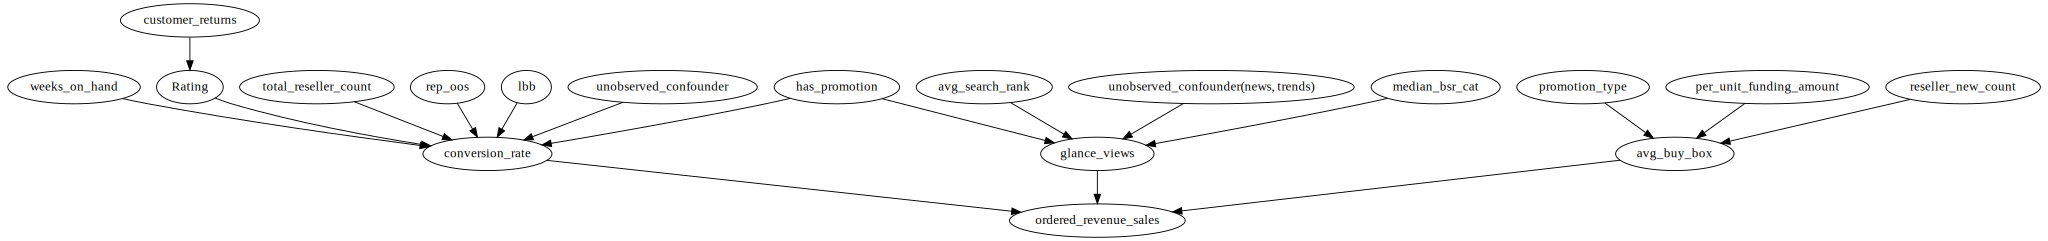

In [ ]:

from causalgraphicalmodels import CausalGraphicalModel
graph = CausalGraphicalModel(
    nodes=[ 'ordered_revenue_sales', 'glance_views',
       'conversion_rate', 'rep_oos', 'lbb', 'customer_returns',
       'weeks_on_hand', 'promotion_type',
       'has_promotion', 'per_unit_funding_amount', 'Rating',
       'reseller_new_count', 'total_reseller_count', 'median_bsr_cat',
       'avg_buy_box', 'avg_search_rank', 'Rating',
       'unobserved_confounder(news, trends)',
       'unobserved_confounder'],
    edges=[
        ("glance_views", "ordered_revenue_sales"), 
        ("conversion_rate", "ordered_revenue_sales"), 
        ("avg_buy_box", "ordered_revenue_sales"),
        
        
        ("unobserved_confounder(news, trends)", "glance_views"),
        ("unobserved_confounder","conversion_rate"),
        
        ("rep_oos",'conversion_rate'),
        ('lbb',"conversion_rate"),
        ('weeks_on_hand','conversion_rate'),
        ("has_promotion","conversion_rate"),
        ("total_reseller_count","conversion_rate" ),
        ("Rating", "conversion_rate"),

        ("customer_returns", "Rating"),

        ("has_promotion", "glance_views"),
        ('avg_search_rank',"glance_views"),
        ('median_bsr_cat','glance_views'),

        ('reseller_new_count',"avg_buy_box"),
        ('per_unit_funding_amount','avg_buy_box'),
        ("promotion_type","avg_buy_box" )

    ]
)
G=graph.draw()
G

## 2. Identify

Keeping everything else constant can be thought by imagining a Counterfactual World or a paralell universe where everything was same uptill the point when the treatment was introduced. In the factual world the treatment was provided whereas in the Counterfactual world it wasn’t. Thus any change in Outcome that we might be observing would be solely due to the Treatment.

In [ ]:
sales_df.isnull().sum()

Sales_Week                      0
Sales_Year                      0
ordered_revenue_sales           0
glance_views                    0
conversion_rate                 0
rep_oos                         0
lbb                             0
customer_returns                0
weeks_on_hand                   0
open_purchase_order_quantity    0
promotion_type                  0
has_promotion                   0
per_unit_funding_amount         0
Rating                          0
reseller_new_count              0
total_reseller_count            0
median_bsr_cat                  0
avg_buy_box                     0
avg_search_rank                 0
dtype: int64

In [ ]:
identified_estimand1 = model1.identify_effect(proceed_when_unidentifiable=True)
identified_estimand2 = model2.identify_effect(proceed_when_unidentifiable=True)
identified_estimand3 = model3.identify_effect(proceed_when_unidentifiable=True)

In [ ]:
print(identified_estimand1)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                           
───────────────(Expectation(ordered_revenue_sales))
d[hasₚᵣₒₘₒₜᵢₒₙ]                                    
Estimand assumption 1, Unconfoundedness: If U→{has_promotion} and U→ordered_revenue_sales then P(ordered_revenue_sales|has_promotion,,U) = P(ordered_revenue_sales|has_promotion,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [ ]:
print(identified_estimand2)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                   d                                                        
────────────────────────────────────────(Expectation(ordered_revenue_sales))
d[hasₚᵣₒₘₒₜᵢₒₙ  per_unit_funding_amount]                                    
Estimand assumption 1, Unconfoundedness: If U→{has_promotion,per_unit_funding_amount} and U→ordered_revenue_sales then P(ordered_revenue_sales|has_promotion,per_unit_funding_amount,,U) = P(ordered_revenue_sales|has_promotion,per_unit_funding_amount,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [ ]:
print(identified_estimand3)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                          
──────────────(Expectation(ordered_revenue_sales|promotion_type))
d[avg_buy_box]                                                   
Estimand assumption 1, Unconfoundedness: If U→{avg_buy_box} and U→ordered_revenue_sales then P(ordered_revenue_sales|avg_buy_box,promotion_type,U) = P(ordered_revenue_sales|avg_buy_box,promotion_type)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(ordered_revenue_sales, [unobserved_confounder, reseller
_new_count, per_unit_funding_amount])*Derivative([avg_buy_box], [unobserved_co
nfounder, reseller_new_count, per_unit_funding_amount])**(-1))
Estimand assumption 1, As-if-random: If U→→ordered_revenue_sales then ¬(U →→{unobserved_confounder,reseller_new_count,per_unit_funding_amount})
Estimand assumption 2, Exclusion: If we remove {unobserved_confounder,reseller_new_

## 3. Estimate

In [ ]:
import time

In [ ]:
sales_df['has_promotion'].unique()

array([False,  True])

In [ ]:
sales_df['has_promotion'] = sales_df['has_promotion'].astype({'has_promotion':'bool'}, copy=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# sales_df['promotion_type'].replace({item: i for i, item in enumerate(sales_df['promotion_type'].unique())}, inplace=True)
# d = {0:0, 1:1, 2:1}
# sales_df['promotion_type'].replace(d, inplace=True)
# sales_df['promotion_type'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([0, 1])

#### Single Treatment with Backdoor Linear Regression

In [ ]:
start = time.time()
estimate1 = model1.estimate_effect(identified_estimand1,
                                 method_name="backdoor.linear_regression", confidence_intervals=True)
end = time.time()
print(estimate1)
print("Computational Time: ", end-start)
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room))

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb', 'unobserved_confounder']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'w

#### Multiple Treatment with Backdoor Linear Regression

In [ ]:
start = time.time()
estimate2 = model2.estimate_effect(identified_estimand2,
                                 method_name="backdoor.linear_regression", confidence_intervals=True)
end = time.time()
print(estimate2)
print("Computational Time: ", end-start)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb', 'unobserved_confounder']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_cou

#### Average Buy Box Treatment with Backdoor Linear Regression

In [ ]:
start = time.time()
estimate3 = model3.estimate_effect(identified_estimand3,
                                 method_name="backdoor.linear_regression", confidence_intervals=True)
end = time.time()
print(estimate3)
print("Computational Time: ", end-start)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', '

#### Average Buy Box Treatment with IV Linear Regression

In [ ]:
start = time.time()
estimate4 = model3.estimate_effect(identified_estimand3,
                                 method_name="iv.linear_regression", confidence_intervals=True)
end = time.time()
print(estimate3)
print("Computational Time: ", end-start)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', '

#### Average Buy Box Treatment with Frontdoor Linear Regression

In [ ]:
start = time.time()
estimate5 = model3.estimate_effect(identified_estimand3,
                                 method_name="frontdoor.linear_regression", confidence_intervals=True)
end = time.time()
print(estimate5)
print("Computational Time: ", end-start)

ERROR:dowhy.causal_model:No valid identified estimand available.


linear_regression
Estimation failed! No relevant identified estimand available for this estimation method.
Computational Time:  0.015394449234008789


#### Single Treatment with Backdoor Distance Matching

In [ ]:
start = time.time()
estimate6 = model1.estimate_effect(identified_estimand1,
                                 method_name="backdoor.distance_matching",
                                              target_units="att",
                                              method_params={'distance_metric':"minkowski", 'p':2})
end = time.time()
print(estimate6)
print("Computational Time: ", end-start)

ERROR:dowhy.causal_estimator:No common causes/confounders present. Distance matching methods are not applicable


distance_matching


Exception: ignored

## 4. Refute

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
refute_results1 = model1.refute_estimate(identified_estimand1, estimate1,
                                       method_name="random_common_cause")
print(refute_results1)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb', 'unobserved_confounder']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'weeks_on_hand', 'a

                 Note: The underlying distribution may not be Normal. We assume that it approaches normal with the increase in sample size.


{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'lbb']}
Refute: Add a random common cause
Estimated effect:57011.03056700167
New effect:54189.872320623115
p value:0.28101962909158085



In [ ]:
refute_results2 = model2.refute_estimate(identified_estimand2, estimate2,
                                       method_name="random_common_cause")
print(refute_results2)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb', 'unobserved_confounder']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_ne

                 Note: The underlying distribution may not be Normal. We assume that it approaches normal with the increase in sample size.


Refute: Add a random common cause
Estimated effect:135588.9797343146
New effect:124261.88346059155
p value:0.20960257350954825



In [ ]:
refute_results3 = model1.refute_estimate(identified_estimand3, estimate3,
                                       method_name="random_common_cause")
print(refute_results3)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 

                 Note: The underlying distribution may not be Normal. We assume that it approaches normal with the increase in sample size.


{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'lbb']}
Refute: Add a random common cause
Estimated effect:2862.131086433481
New effect:2856.4694451531045
p value:0.31904122830464066



In [ ]:
refute_results1 = model1.refute_estimate(identified_estimand1, estimate1,
                                       method_name="data_subset_refuter")
print(refute_results1)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb', 'unobserved_confounder']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['per_unit_funding_amount', 'weeks_on_hand', 'a

                 Note: The underlying distribution may not be Normal. We assume that it approaches normal with the increase in sample size.


Refute: Use a subset of data
Estimated effect:57011.03056700167
New effect:57413.66242580183
p value:0.4957549514460962



In [ ]:
refute_results2 = model2.refute_estimate(identified_estimand2, estimate2,
                                       method_name="data_subset_refuter")
print(refute_results2)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb', 'unobserved_confounder']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_ne

                 Note: The underlying distribution may not be Normal. We assume that it approaches normal with the increase in sample size.


{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['weeks_on_hand', 'avg_search_rank', 'Rating', 'median_bsr_cat', 'total_reseller_count', 'reseller_new_count', 'customer_returns', 'rep_oos', 'lbb']}
Refute: Use a subset of data
Estimated effect:135588.9797343146
New effect:139614.29803964478
p value:0.4905235751563043



In [ ]:
refute_results3 = model3.refute_estimate(identified_estimand3, estimate3,
                                       method_name="data_subset_refuter")
print(refute_results3)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'unobserved_confounder_like_news', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'lbb']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 

                 Note: The underlying distribution may not be Normal. We assume that it approaches normal with the increase in sample size.


{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['glance_views', 'weeks_on_hand', 'avg_search_rank', 'Rating', 'conversion_rate', 'median_bsr_cat', 'total_reseller_count', 'customer_returns', 'rep_oos', 'lbb']}
Refute: Use a subset of data
Estimated effect:2862.131086433481
New effect:2931.665215150369
p value:0.39842444041222813



# Conclusion

Null hypothesis: promo (price discount type) will lead to change in sales

Alternate hypothesis: promo has no effect on sales

P value > 0.05 i.e we can't refute our null hypothesis




<b>Summary</b>: For PSW10 BLACK (one of the top selling polk product), promo causes $2889 increase in sales given all other factors(traffic, conversion etc) remain constant

try including timeweeknum, quarter

# Feedback

In [ ]:
data = [
    {'Treatment Variables': ['has_promotion'], 'Estimators': ['Backdoor Linear Regression'], 'Mean': 57011, 
     'Time': 15.905788660049438, 'Confidence interval': '(-84443.78238374682, 205324.32490971978)'},
    {'Treatment Variables': ['has_promotion'], 'Estimators': ['Backdoor Distance Matching'], 'Mean': 'NA', 
    'Time': 'NA', 'Confidence interval': 'NA'},
    {'Treatment Variables': ['has_promotion', 'per_unit_funding'], 'Estimators': ['Backdoor Linear Regression'], 'Mean': 135589, 
    'Time': 13.662814855575562, 'Confidence interval': '(-226123.78240539343, 606469.7063051602)'},
    {'Treatment Variables': ['avg_buy_box'], 'Estimators': ['Backdoor Linear Regression'], 'Mean': 2862, 
    'Time': 11.641807317733765, 'Confidence interval': '(1389.3646241982933, 5266.932434086339)'},
    {'Treatment Variables': ['avg_buy_box'], 'Estimators': ['IV Linear Regression'], 'Mean': 2862, 
    'Time': 13.071146965026855, 'Confidence interval': '(1078.3019407297252, 5268.075626080259)'},
    {'Treatment Variables': ['avg_buy_box'], 'Estimators': ['Frontdoor Linear Regression'], 'Mean': 'NA', 
    'Time': 'NA', 'Confidence interval': 'NA'}
]

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Treatment Variables,Estimators,Mean,Time,Confidence interval
0,[has_promotion],[Backdoor Linear Regression],57011,15.905789,"(-84443.78238374682, 205324.32490971978)"
1,[has_promotion],[Backdoor Distance Matching],NA,NA,NA
2,"[has_promotion, per_unit_funding]",[Backdoor Linear Regression],135589,13.662815,"(-226123.78240539343, 606469.7063051602)"
3,[avg_buy_box],[Backdoor Linear Regression],2862,11.641807,"(1389.3646241982933, 5266.932434086339)"
4,[avg_buy_box],[IV Linear Regression],2862,13.071147,"(1078.3019407297252, 5268.075626080259)"
5,[avg_buy_box],[Frontdoor Linear Regression],NA,NA,NA
